In [1]:
import pandas as pd

# Assuming your data is stored in a csv file named 'data.csv'
df = pd.read_csv('Movie dataset.csv', encoding = 'unicode_escape')

# Select the features you want to keep
df = df[['Genre', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']]

# Drop rows with null values in any of the specified columns
df.dropna(subset=['Genre', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], inplace=True)

# Now 'df' will not contain any rows with null values in the specified columns

In [7]:
df.head()

,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,"Drama, Romance, War",7.4,1086.0,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [5]:
# Handle commas in Rating and Votes (if applicable)
def convert_to_numeric(x):
  try:
    # Remove commas if present
    return float(str(x).replace(",", ""))
  except ValueError:
    # Handle potential conversion errors (e.g., replace with NaN)
    return np.nan  # Use np.nan from numpy for Not a Number

df['Rating'] = df['Rating'].apply(convert_to_numeric)
df['Votes'] = df['Votes'].apply(convert_to_numeric)

In [6]:
df.head()

,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,"Drama, Romance, War",7.4,1086.0,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [8]:
# Calculate average Rating and Votes using groupby with error handling
def calculate_stats(group):
  try:
    return group[['Rating', 'Votes']].mean()
  except:
    # Handle potential exceptions during mean calculation (e.g., return empty DataFrame)
    return pd.DataFrame({'Rating': np.nan, 'Votes': np.nan})

director_stats = df.groupby('Director').apply(calculate_stats)
actor1_stats = df.groupby('Actor 1').apply(calculate_stats)
actor2_stats = df.groupby('Actor 2').apply(calculate_stats)
actor3_stats = df.groupby('Actor 3').apply(calculate_stats)

In [9]:
# Rename columns in director_stats
director_stats.columns = ['Director_Avg_Rating', 'Director_Avg_Votes']
actor1_stats.columns=['Actor1_Avg_Rating', 'Actor1_Avg_Votes']
actor2_stats.columns=['Actor2_Avg_Rating', 'Actor2_Avg_Votes']
actor3_stats.columns=['Actor3_Avg_Rating', 'Actor3_Avg_Votes']

# Merge with actor stats (no need for suffixes)
df = df.merge(director_stats, how='left', on='Director')
df = df.merge(actor1_stats, how='left', on='Actor 1')
df = df.merge(actor2_stats, how='left', on='Actor 2')
df = df.merge(actor3_stats, how='left', on='Actor 3')

In [11]:
df.to_csv('preprocessed_Movie_data.csv', index=False)


In [12]:
print(df.head())

                       Genre  Rating   Votes        Director          Actor 1  \
0                      Drama     7.0     8.0   Gaurav Bakshi     Rasika Dugal   
1            Comedy, Romance     4.4    35.0      Ovais Khan          Prateik   
2     Comedy, Drama, Musical     4.7   827.0    Rahul Rawail       Bobby Deol   
3        Drama, Romance, War     7.4  1086.0  Shoojit Sircar  Jimmy Sheirgill   
4  Horror, Mystery, Thriller     5.6   326.0   Allyson Patel        Yash Dave   

                  Actor 2          Actor 3  Director_Avg_Rating  \
0          Vivek Ghamande    Arvind Jangid             7.000000   
1              Ishita Raj  Siddhant Kapoor             4.400000   
2  Aishwarya Rai Bachchan    Shammi Kapoor             5.358824   
3          Minissha Lamba   Yashpal Sharma             7.500000   
4          Muntazir Ahmad     Kiran Bhatia             5.600000   

   Director_Avg_Votes  Actor1_Avg_Rating  Actor1_Avg_Votes  Actor2_Avg_Rating  \
0            8.000000        

Until now we removes all the rows with null values


In [13]:
# Check for null values
null_values = df.isnull().sum()

# Print a summary of null values by column
print("Summary of null values by column:")
print(null_values)

Summary of null values by column:
Genre                  0
Rating                 0
Votes                  0
Director               0
Actor 1                0
Actor 2                0
Actor 3                0
Director_Avg_Rating    0
Director_Avg_Votes     0
Actor1_Avg_Rating      0
Actor1_Avg_Votes       0
Actor2_Avg_Rating      0
Actor2_Avg_Votes       0
Actor3_Avg_Rating      0
Actor3_Avg_Votes       0
dtype: int64


In [15]:
# Check if there are any null values in the entire DataFrame
has_null_values = df.isnull().values.any()

if has_null_values:
  print("\nThere are null values in the preprocessed DataFrame.")
else:
  print("\nThere are no null values in the preprocessed DataFrame.")


There are no null values in the preprocessed DataFrame.


In [16]:
import pandas as pd

# Load data
df = pd.read_csv("preprocessed_Movie_data.csv")

def iqr_outlier_removal(df, feature):
  """
  Identifies and removes outliers based on IQR for a specific feature.

  Args:
      df (pandas.DataFrame): The DataFrame containing the data.
      feature (str): The name of the feature for which to detect outliers.

  Returns:
      pandas.DataFrame: The DataFrame with outliers removed for the specified feature.
  """
  Q1 = df[feature].quantile(0.25)
  Q3 = df[feature].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - (1.5 * IQR)
  upper_bound = Q3 + (1.5 * IQR)
  return df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

# Apply outlier removal to numerical features (replace with your actual features)
for feature in ['Rating', 'Votes','Director_Avg_Rating','Director_Avg_Votes','Actor1_Avg_Rating','Actor1_Avg_Votes','Actor2_Avg_Rating','Actor2_Avg_Votes','Actor3_Avg_Rating','Actor3_Avg_Rating']:
  df = iqr_outlier_removal(df.copy(), feature)

# Save the DataFrame without outliers (optional)
# df.to_csv("preprocessed_Movie_data_without_outliers.csv", index=False)

# Print the DataFrame after outlier removal (optional)
print(df)


                          Genre  Rating  Votes           Director  \
0                         Drama     7.0    8.0      Gaurav Bakshi   
4     Horror, Mystery, Thriller     5.6  326.0      Allyson Patel   
5       Action, Crime, Thriller     4.0   11.0  Biju Bhaskar Nair   
6                         Drama     6.2   17.0        Madhu Ambat   
7                        Horror     5.9   59.0    Arshad Siddiqui   
...                         ...     ...    ...                ...   
7549  Action, Adventure, Comedy     5.6   33.0        Shibu Mitra   
7552       Action, Crime, Drama     4.9   11.0              Chand   
7553       Action, Crime, Drama     5.3  135.0  Bharat Rangachary   
7554       Action, Crime, Drama     5.8   44.0    S.P. Muthuraman   
7557              Action, Drama     6.2   20.0       K.C. Bokadia   

             Actor 1              Actor 2        Actor 3  Director_Avg_Rating  \
0       Rasika Dugal       Vivek Ghamande  Arvind Jangid             7.000000   
4        

In [18]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Read the preprocessed data
df = pd.read_csv('preprocessed_Movie_data.csv')

# Separate Genre column
genres = df['Genre'].copy()

# Create OneHotEncoder object
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Encode the Genre categories
genre_encoded = encoder.fit_transform(genres.values.reshape(-1, 1))

# Get the encoded genre column names
genre_names = encoder.get_feature_names_out(['Genre'])

# Convert the encoded data to a DataFrame
genre_df = pd.DataFrame(genre_encoded, columns=genre_names)

# Drop the original Genre column
df.drop('Genre', axis=1, inplace=True)

# Join the encoded genre DataFrame with the original data
df = pd.concat([df, genre_df], axis=1)

# Save the data with encoded genres
df.to_csv('preprocessed_Movie_data_encoded.csv', index=False)

In [19]:
print(df.head())

   Rating   Votes        Director          Actor 1                 Actor 2  \
0     7.0     8.0   Gaurav Bakshi     Rasika Dugal          Vivek Ghamande   
1     4.4    35.0      Ovais Khan          Prateik              Ishita Raj   
2     4.7   827.0    Rahul Rawail       Bobby Deol  Aishwarya Rai Bachchan   
3     7.4  1086.0  Shoojit Sircar  Jimmy Sheirgill          Minissha Lamba   
4     5.6   326.0   Allyson Patel        Yash Dave          Muntazir Ahmad   

           Actor 3  Director_Avg_Rating  Director_Avg_Votes  \
0    Arvind Jangid             7.000000            8.000000   
1  Siddhant Kapoor             4.400000           35.000000   
2    Shammi Kapoor             5.358824          706.470588   
3   Yashpal Sharma             7.500000        17179.285714   
4     Kiran Bhatia             5.600000          326.000000   

   Actor1_Avg_Rating  Actor1_Avg_Votes  ...  Genre_Romance, Thriller, Mystery  \
0           6.850000        155.000000  ...                            

now we converted categorical type column(Genre) into a float value

In [20]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Read the preprocessed data (assuming encoded Genre)
df = pd.read_csv('preprocessed_Movie_data_encoded.csv')

# Separate features (excluding encoded Genre) and target (Rating)
X = df.drop(columns=['Rating', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'])
y = df['Rating']  # Target variable

# Create MinMaxScaler object
scaler = MinMaxScaler(feature_range=(0, 1))  # Scale to 0-1 range

# Fit the scaler on the features (excluding encoded Genre)
scaler.fit(X)

# Transform the features using the fitted scaler
X_scaled = scaler.transform(X)

# Combine the scaled features and target variable
df_scaled = pd.concat([pd.DataFrame(X_scaled, columns=X.columns), y], axis=1)

# Save the data with scaled features
df_scaled.to_csv('preprocessed_Movie_data_scaled.csv', index=False)


In [ ]:
# Convert the NumPy array to a pandas DataFrame (optional)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Print the first few rows of the scaled features DataFrame
print(X_scaled_df.head())

      Votes  Director_Avg_Rating  Director_Avg_Votes  Actor1_Avg_Rating  \
0  0.000005             0.638554            0.000005           0.633721   
1  0.000051             0.325301            0.000051           0.467442   
2  0.001390             0.440822            0.001186           0.394057   
3  0.001828             0.698795            0.029039           0.453488   
4  0.000543             0.469880            0.000543           0.488372   

   Actor1_Avg_Votes  Actor2_Avg_Rating  Actor2_Avg_Votes  Actor3_Avg_Rating  \
0          0.000254           0.642857          0.000014           0.638554   
1          0.005568           0.333333          0.000136           0.331325   
2          0.002161           0.498413          0.047163           0.489960   
3          0.001177           0.529762          0.006207           0.578313   
4          0.000543           0.509921          0.002860           0.469880   

   Actor3_Avg_Votes  Genre_Action  ...  Genre_Romance, Thriller, Mystery  

In [21]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv("preprocessed_Movie_data.csv")

# Calculate the number of non-null values in each column
num_rows_per_col = df.shape[0] - df.isna().sum(axis=0)

# Print the results
print(num_rows_per_col)

Genre                  7558
Rating                 7558
Votes                  7558
Director               7558
Actor 1                7558
Actor 2                7558
Actor 3                7558
Director_Avg_Rating    7558
Director_Avg_Votes     7558
Actor1_Avg_Rating      7558
Actor1_Avg_Votes       7558
Actor2_Avg_Rating      7558
Actor2_Avg_Votes       7558
Actor3_Avg_Rating      7558
Actor3_Avg_Votes       7558
dtype: int64


# Linear Regeassion

Linear Regression:
Training RMSE: 0.6680
Validation RMSE: 0.6728
Training R-squared: 0.7603
Validation R-squared: 0.7633


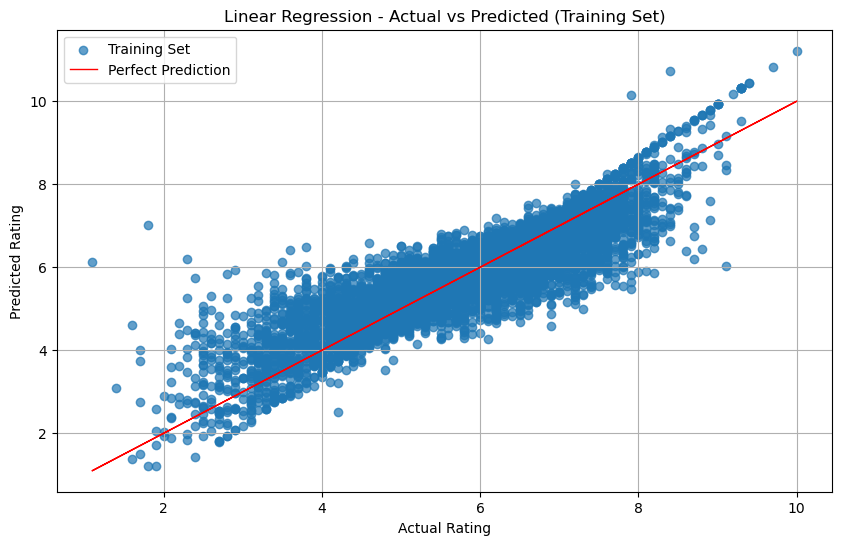

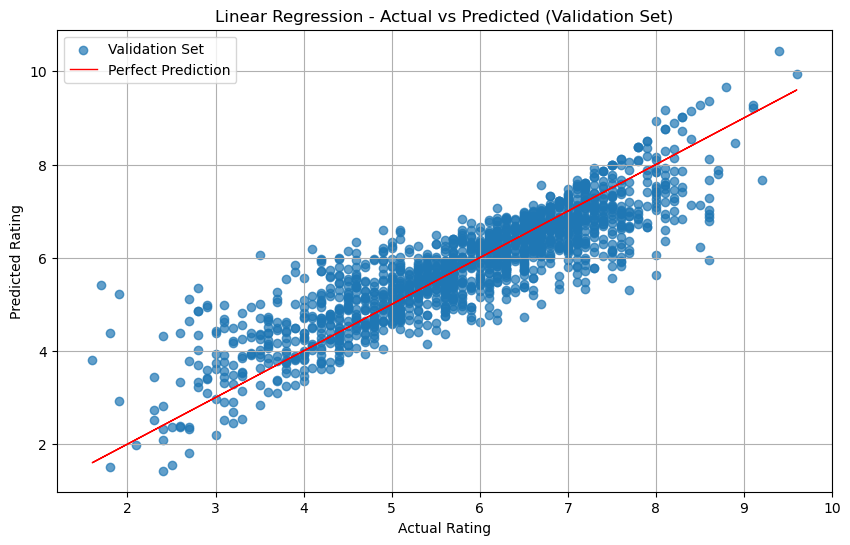

In [28]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load data (replace with your data loading)
df = pd.read_csv("preprocessed_Movie_data.csv")

# Drop unwanted features
df = df.drop(columns=["Director","Genre", "Actor 1", "Actor 2", "Actor 3"])

# Define features and target
X = df.drop("Rating", axis=1)
y = df["Rating"]


# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=25)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on training and validation sets
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

# Calculate RMSE and R-squared scores
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_val = mean_squared_error(y_val, y_val_pred, squared=False)

r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)

# Print results
print("Linear Regression:")
print(f"Training RMSE: {rmse_train:.4f}")
print(f"Validation RMSE: {rmse_val:.4f}")
print(f"Training R-squared: {r2_train:.4f}")
print(f"Validation R-squared: {r2_val:.4f}")

# Plot actual vs predicted ratings (training set)
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, alpha=0.7, label="Training Set")
plt.plot(y_train, y_train, color="red", linewidth=1, label="Perfect Prediction")  # Add perfect prediction line
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Linear Regression - Actual vs Predicted (Training Set)")
plt.legend()
plt.grid(True)
plt.show()

# Plot actual vs predicted ratings (validation set) - similar to training set plot
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred, alpha=0.7, label="Validation Set")
plt.plot(y_val, y_val, color="red", linewidth=1, label="Perfect Prediction")
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Linear Regression - Actual vs Predicted (Validation Set)")
plt.legend()
plt.grid(True)
plt.show()


Linear Regression with improvements:
Training RMSE: 0.6740
Validation RMSE: 0.6623
Training R-squared: 0.7561
Validation R-squared: 0.7702


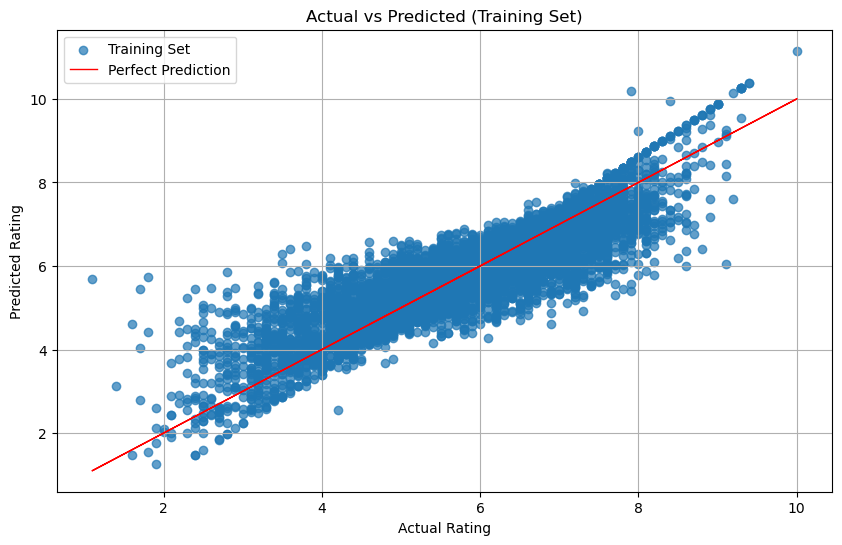

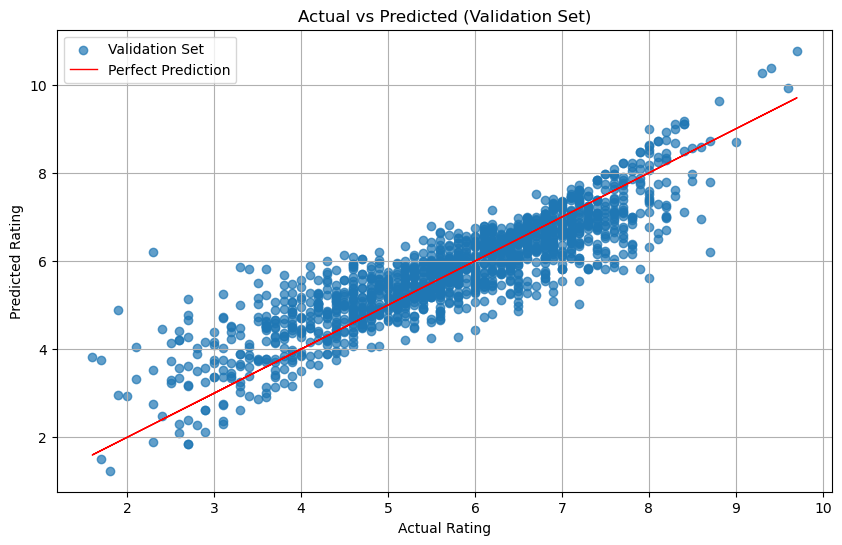

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso  # L1 regularization
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score

# Load data (replace with your data loading)
df = pd.read_csv("preprocessed_Movie_data.csv")

# Drop unwanted features (consider feature importance for better selection)
df = df.drop(columns=["Director","Genre", "Actor 1", "Actor 2", "Actor 3"])

# Define features and target
X = df.drop("Rating", axis=1)
y = df["Rating"]


# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=46)

# Feature Scaling (improve model convergence)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Feature Selection (focus on relevant features)
# This can be further improved using techniques like L1 regularization
selector = SelectKBest(f_regression, k='all')  # Choose the top 10 features
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_val_selected = selector.transform(X_val_scaled)

# Create and fit the model
model = Lasso(alpha=0.01)
model.fit(X_train_selected, y_train)

# Make predictions on training and validation sets
y_train_pred = model.predict(X_train_selected)
y_val_pred = model.predict(X_val_selected)

# Calculate RMSE and R-squared scores
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_val = mean_squared_error(y_val, y_val_pred, squared=False)

r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)

# Print results
print("Linear Regression with improvements:")
print(f"Training RMSE: {rmse_train:.4f}")
print(f"Validation RMSE: {rmse_val:.4f}")
print(f"Training R-squared: {r2_train:.4f}")
print(f"Validation R-squared: {r2_val:.4f}")
# Plot actual vs predicted ratings (training set)
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, alpha=0.7, label="Training Set")
plt.plot(y_train, y_train, color="red", linewidth=1, label="Perfect Prediction")  # Add perfect prediction line
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Actual vs Predicted (Training Set)")
plt.legend()
plt.grid(True)
plt.show()

# Plot actual vs predicted ratings (validation set) - similar to training set plot
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred, alpha=0.7, label="Validation Set")
plt.plot(y_val, y_val, color="red", linewidth=1, label="Perfect Prediction")
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Actual vs Predicted (Validation Set)")
plt.legend()
plt.grid(True)
plt.show()



# Decision tree regressor

DecisionTreeRegressor:
Training RMSE: 0.5925
Validation RMSE: 0.6864
Training R-squared: 0.8159
Validation R-squared: 0.7264


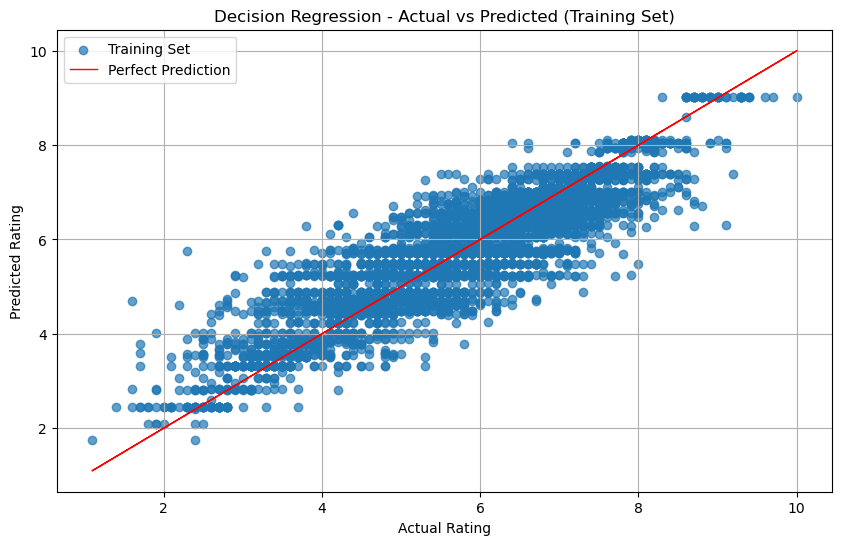

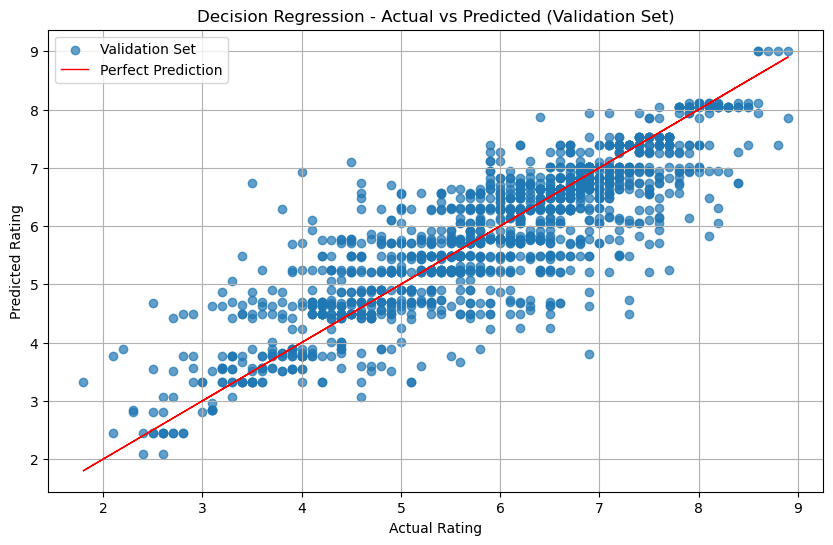

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

# Load data (replace with your data loading)
df = pd.read_csv("preprocessed_Movie_data.csv")

# Drop unwanted features
df = df.drop(columns=["Director","Genre", "Actor 1", "Actor 2", "Actor 3"])

# Define features and target
X = df.drop("Rating", axis=1)
y = df["Rating"]


# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2)

# Create and fit the model
#model = DecisionTreeRegressor(max_depth=5)
#model = DecisionTreeRegressor(max_depth=15, min_samples_leaf=20)
model = DecisionTreeRegressor(ccp_alpha=0.001)



model.fit(X_train, y_train)

# Make predictions on training and validation sets
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

# Calculate RMSE and R-squared scores
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_val = mean_squared_error(y_val, y_val_pred, squared=False)

r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)

# Print results
print("DecisionTreeRegressor:")
print(f"Training RMSE: {rmse_train:.4f}")
print(f"Validation RMSE: {rmse_val:.4f}")
print(f"Training R-squared: {r2_train:.4f}")
print(f"Validation R-squared: {r2_val:.4f}")
# Plot actual vs predicted ratings (training set)
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, alpha=0.7, label="Training Set")
plt.plot(y_train, y_train, color="red", linewidth=1, label="Perfect Prediction")  # Add perfect prediction line
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Decision Regression - Actual vs Predicted (Training Set)")
plt.legend()
plt.grid(True)
plt.show()

# Plot actual vs predicted ratings (validation set) - similar to training set plot
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred, alpha=0.7, label="Validation Set")
plt.plot(y_val, y_val, color="red", linewidth=1, label="Perfect Prediction")
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Decision Regression - Actual vs Predicted (Validation Set)")
plt.legend()
plt.grid(True)
plt.show()



# Random forest

RandomForestRegressor:
Training RMSE: 0.5877
Validation RMSE: 0.7089
Training R-squared: 0.8162
Validation R-squared: 0.7271


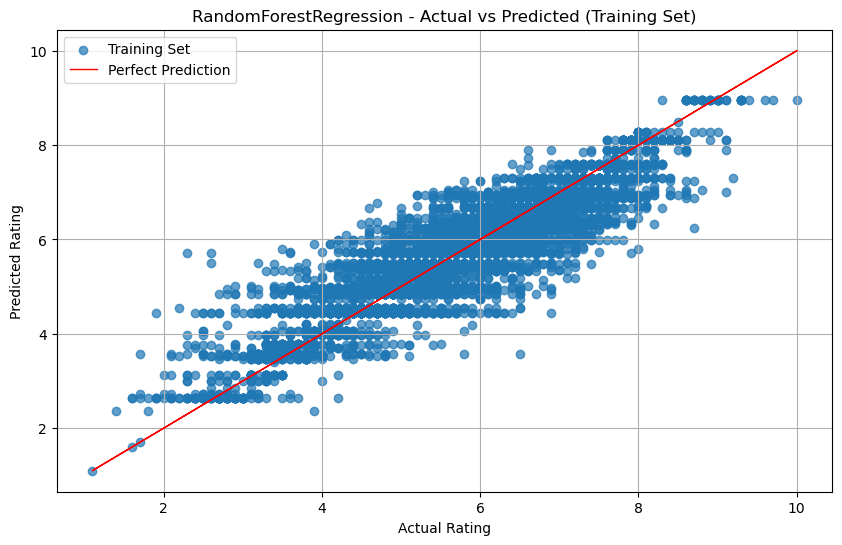

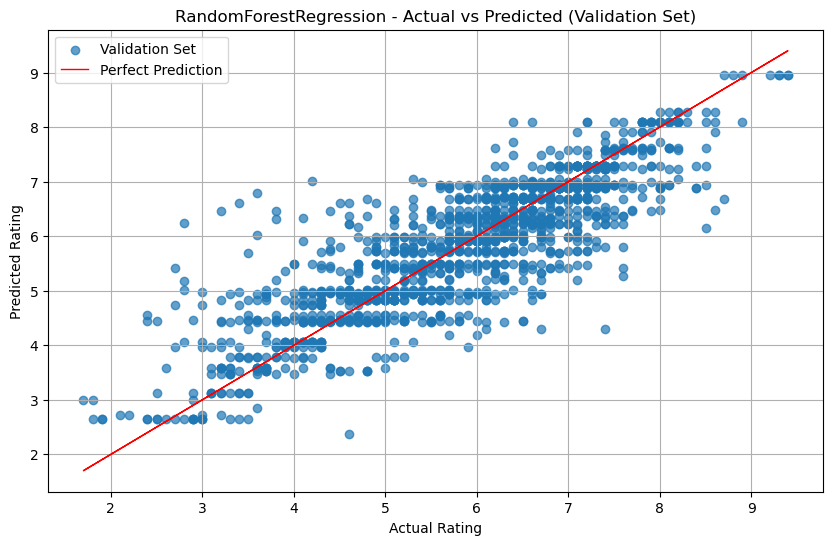

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Load data (replace with your data loading)
df = pd.read_csv("preprocessed_Movie_data.csv")

# Drop unwanted features
df = df.drop(columns=["Director",'Genre', "Actor 1", "Actor 2", "Actor 3"])

# Define features and target
X = df.drop("Rating", axis=1)
y = df["Rating"]


# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=24)

# Create and fit the model
#model = RandomForestRegressor(n_estimators=50)

#model = RandomForestRegressor(n_estimators=1000, max_depth=50)

#model = RandomForestRegressor(n_estimators=200, min_samples_leaf=15)

#model = RandomForestRegressor(n_estimators=200, max_features="sqrt")  # Consider sqrt of features


model.fit(X_train, y_train)

# Make predictions on training and validation sets
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

# Calculate RMSE and R-squared scores
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_val = mean_squared_error(y_val, y_val_pred, squared=False)

r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)

# Print results
print("RandomForestRegressor:")
print(f"Training RMSE: {rmse_train:.4f}")
print(f"Validation RMSE: {rmse_val:.4f}")
print(f"Training R-squared: {r2_train:.4f}")
print(f"Validation R-squared: {r2_val:.4f}")

# Plot actual vs predicted ratings (training set)
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, alpha=0.7, label="Training Set")
plt.plot(y_train, y_train, color="red", linewidth=1, label="Perfect Prediction")  # Add perfect prediction line
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("RandomForestRegression - Actual vs Predicted (Training Set)")
plt.legend()
plt.grid(True)
plt.show()

# Plot actual vs predicted ratings (validation set) - similar to training set plot
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred, alpha=0.7, label="Validation Set")
plt.plot(y_val, y_val, color="red", linewidth=1, label="Perfect Prediction")
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("RandomForestRegression - Actual vs Predicted (Validation Set)")
plt.legend()
plt.grid(True)
plt.show()


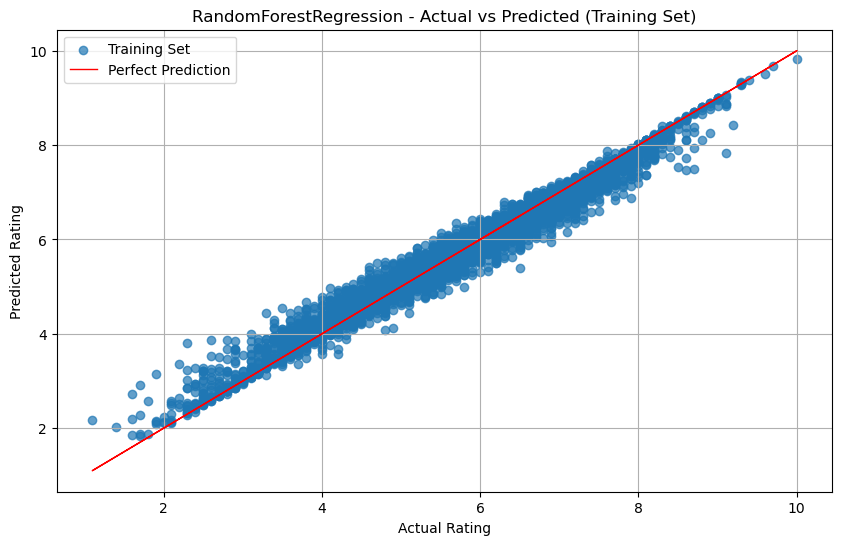

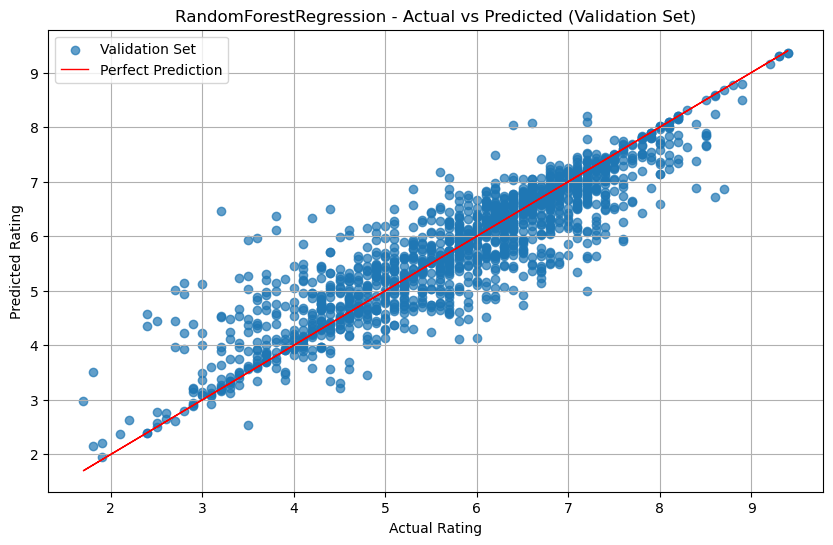

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Load data (replace with your data loading)
df = pd.read_csv("preprocessed_Movie_data.csv")

# Drop unwanted features
df = df.drop(columns=["Director",'Genre', "Actor 1", "Actor 2", "Actor 3"])

# Define features and target
X = df.drop("Rating", axis=1)
y = df["Rating"]


# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=24)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15]
}

model = RandomForestRegressor(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model and predict
best_model = grid_search.best_estimator_
y_train_pred = best_model.predict(X_train)
y_val_pred = best_model.predict(X_val)



model.fit(X_train, y_train)

# Make predictions on training and validation sets
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

# Calculate RMSE and R-squared scores
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_val = mean_squared_error(y_val, y_val_pred, squared=False)

r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)


plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, alpha=0.7, label="Training Set")
plt.plot(y_train, y_train, color="red", linewidth=1, label="Perfect Prediction")  # Add perfect prediction line
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("RandomForestRegression - Actual vs Predicted (Training Set)")
plt.legend()
plt.grid(True)
plt.show()

# Plot actual vs predicted ratings (validation set) - similar to training set plot
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred, alpha=0.7, label="Validation Set")
plt.plot(y_val, y_val, color="red", linewidth=1, label="Perfect Prediction")
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("RandomForestRegression - Actual vs Predicted (Validation Set)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.svm import SVR

# Define hyperparameter grid for GridSearchCV
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['rbf', 'linear']}

# Create and perform GridSearchCV with SVR
model_svm = SVR()
grid_search_svm = GridSearchCV(model_svm, param_grid_svm, cv=5, scoring='neg_mean_squared_error')
grid_search_svm.fit(X_train, y_train)

# Get the best model and predict
best_model_svm = grid_search_svm.best_estimator_
y_train_pred_svm = best_model_svm.predict(X_train)
y_val_pred_svm = best_model_svm.predict(X_val)

# Calculate RMSE and R-squared scores
rmse_train_svm = mean_squared_error(y_train, y_train_pred_svm, squared=False)
rmse_val_svm = mean_squared_error(y_val, y_val_pred_svm, squared=False)

r2_train_svm = r2_score(y_train, y_train_pred_svm)
r2_val_svm = r2_score(y_val, y_val_pred_svm)

# Print results
print("SVM:")
print(f"Training RMSE: {rmse_train_svm:.4f}")
print(f"Validation RMSE: {rmse_val_svm:.4f}")
print(f"Training R-squared: {r2_train_svm:.4f}")
print(f"Validation R-squared: {r2_val_svm:.4f}")

# Print best hyperparameters (optional)
print(f"Best Hyperparameters: {grid_search_svm.best_params_}")

# Plot actual vs predicted ratings (optional)
# (similar to the Random Forest example)

plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, alpha=0.7, label="Training Set")
plt.plot(y_train, y_train, color="red", linewidth=1, label="Perfect Prediction")  # Add perfect prediction line
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("SVM - Actual vs Predicted (Training Set)")
plt.legend()
plt.grid(True)
plt.show()

# Plot actual vs predicted ratings (validation set) - similar to training set plot
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred, alpha=0.7, label="Validation Set")
plt.plot(y_val, y_val, color="red", linewidth=1, label="Perfect Prediction")
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("SVM - Actual vs Predicted (Validation Set)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Load data (replace with your data loading)
df = pd.read_csv("preprocessed_Movie_data.csv")

# Drop unwanted features
df = df.drop(columns=["Director","Genre", "Actor 1", "Actor 2", "Actor 3"])

# Define features and target
X = df.drop("Rating", axis=1)
y = df["Rating"]


# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = RandomForestRegressor(n_estimators=500)
model.fit(X_train, y_train)

# Make predictions on training and validation sets
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

# Calculate RMSE and R-squared scores
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_val = mean_squared_error(y_val, y_val_pred, squared=False)

r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)

# Print results
print("Linear Regression:")
print(f"Training RMSE: {rmse_train:.4f}")
print(f"Validation RMSE: {rmse_val:.4f}")
print(f"Training R-squared: {r2_train:.4f}")
print(f"Validation R-squared: {r2_val:.4f}")


In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have already scaled the features and saved them (refer to previous code snippets)

# Load the preprocessed data with scaled features
df = pd.read_csv('preprocessed_Movie_data_scaled.csv')

# Separate features and target
X = df.drop('Rating', axis=1)  # Features
y = df['Rating']  # Target variable

# Split data into training and testing sets (optional but recommended)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% training, 20% testing

# Create the Random Forest model
model = RandomForestRegressor(n_estimators=500, random_state=42)  # Adjust hyperparameters as needed

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate model performance on training and testing sets
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Training Set Performance:")
print("Mean Squared Error (MSE):", mse_train)
print("R-squared:", r2_train)

print("\nTesting Set Performance:")
print("Mean Squared Error (MSE):", mse_test)
print("R-squared:", r2_test)

print("Model trained and evaluated!")


Training Set Performance:
Mean Squared Error (MSE): 0.049894815831955375
R-squared: 0.9734126144260897

Testing Set Performance:
Mean Squared Error (MSE): 0.36566026587301625
R-squared: 0.8026484849507574
Model trained and evaluated!


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load data (replace with your data loading)
df = pd.read_csv("preprocessed_Movie_data.csv")

# Drop unwanted features (consider feature importance for better selection)
df = df.drop(columns=["Director","Genre", "Actor 1", "Actor 2", "Actor 3"])

# Define features and target
X = df.drop("Rating", axis=1)
y = df["Rating"]


# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=20)

# Create and fit the XGBoost model
model = XGBRegressor(objective='reg:squarederror', random_state=20)
# Early stopping parameters (adjust as needed)
eval_set = [(X_val, y_val)]  # Define validation set for early stopping
early_stopping_rounds = 20



model.fit(X_train, y_train, eval_set=eval_set, early_stopping_rounds=early_stopping_rounds)

# Make predictions on training and validation sets
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

# Calculate RMSE and R-squared scores
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_val = mean_squared_error(y_val, y_val_pred, squared=False)

r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)

# Print results
print("XGBoostRegressor:")
print(f"Training RMSE: {rmse_train:.4f}")
print(f"Validation RMSE: {rmse_val:.4f}")
print(f"Training R-squared: {r2_train:.4f}")
print(f"Validation R-squared: {r2_val:.4f}")
